# Visualization of a grid of a minst digit over another image

In [4]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv

In [6]:
from src.data_generation.load_data import load_mnist, sample_uniformly_imgs, load_cifar_10 #, load_imagenet
from src.data_generation.create_data import overlay_small_img_on_large_img_grid
import src.data_generation

In [7]:
import importlib
importlib.reload(src.data_generation.load_data)
from src.data_generation.load_data import sample_uniformly_imgs

In [8]:
import src.data_generation
from src.data_generation.Dataset import Dataset
import importlib

importlib.reload(src.data_generation.Dataset)
from src.data_generation.Dataset import Dataset

In [9]:
cifar10_dataset_train, cifar10_dataset_test = load_cifar_10()
dataset = Dataset()
images = dataset.generate_multi_digits_on_another_dataset_grid(
            cifar10_dataset_train, n_images=4, n_repetition_digit_img=9,
            n_cells_in_grid=9)


Files already downloaded and verified
Files already downloaded and verified


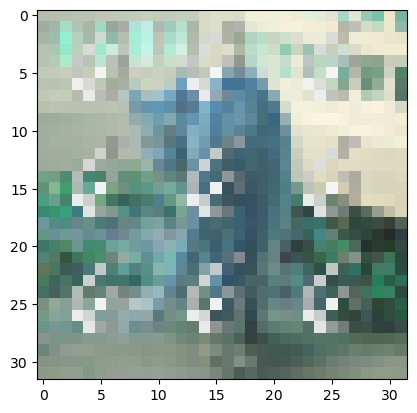

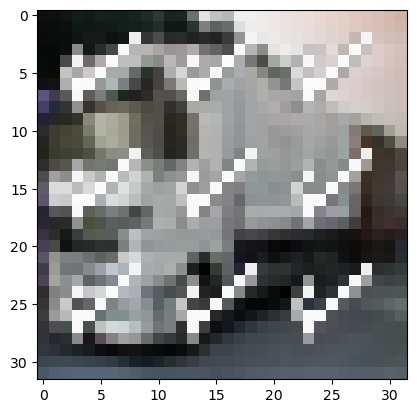

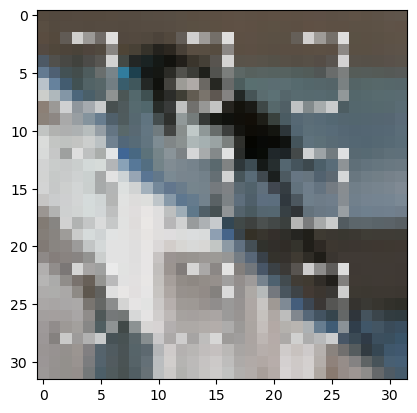

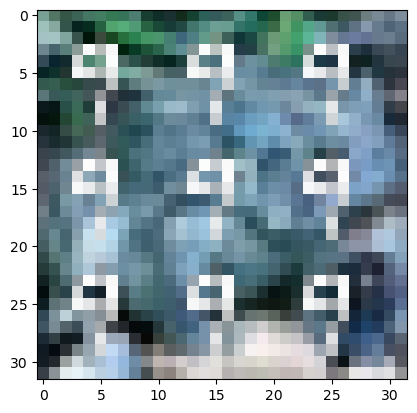

In [10]:
for img in images:
    plt.imshow(img)
    plt.show()

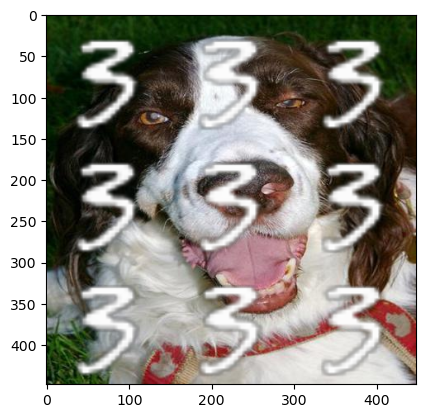

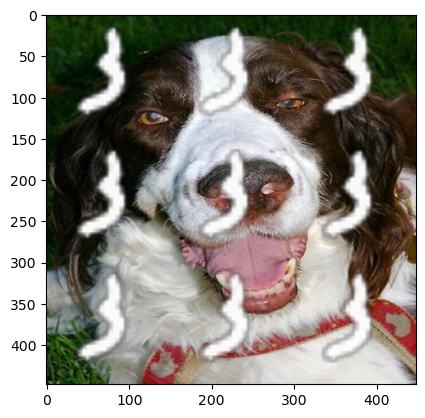

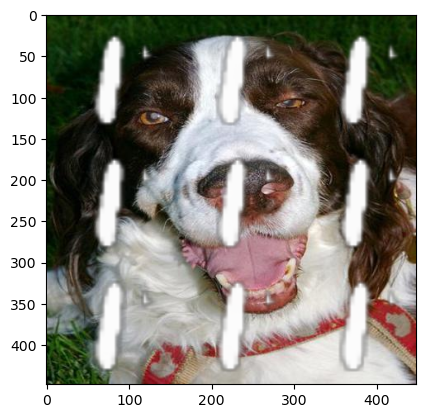

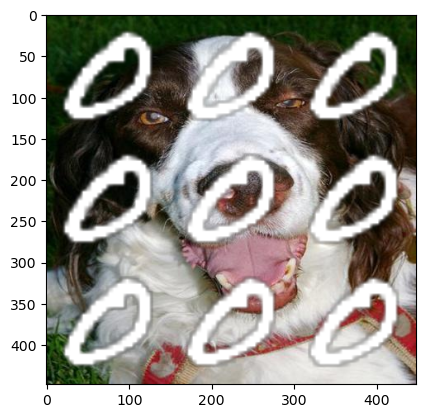

In [13]:
#seed = 6
n_sampled_digits = 4
num_cells_grid = 9
n_repetitions_small_img = 9

#imagenet_dataset_train, imagenet_dataset_test = load_imagenet()
mnist_dataset_train, mnist_dataset_test = load_mnist()

sampled_digit_images = sample_uniformly_imgs(
    mnist_dataset_train, n_sampled_digits) #, seed)

large_img_path = "../../data/img_trial/dog.jpg"
large_img = cv.imread(large_img_path)
# TODO: what about the dim of the mnist img? Is it fine to just
#  downsample/upsample it to the dimension of a cell of a grid?
for sampled_digit_img in sampled_digit_images:
    overlay_small_img_on_large_img_grid(sampled_digit_img, large_img,
                                        num_cells_grid,
                                        n_repetitions_small_img,
                                        is_large_img_grayscale=False,
                                        plot=True);